### Implement two layer Feed Forward Neural Network for XOR Logic Gate with 2-bit Binary Input using Sigmoid activation. Verify the number of learnable parameters in the model.

In [3]:
import torch
from matplotlib import pyplot as plt
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np

In [4]:
loss_list = []
torch.manual_seed(42)

In [5]:
X = torch.tensor([[0,0],[0,1],[1,0],[1,1]], dtype=torch.float32)
Y = torch.tensor([0,1,1,0], dtype=torch.float32)

In [30]:
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.linear1 = nn.Linear(2, 2, bias=True)
        self.activation1 = nn.Sigmoid()
        self.linear2 = nn.Linear(2, 1, bias=True)
        self.activation2 = nn.Linear(1,1,bias=False)

    def forward(self, x):
        x = self.linear1(x)
        x = self.activation1(x)
        x = self.linear2(x)
        x = self.activation2(x)
        return x

In [16]:
class MyDataset(Dataset):
    def __init__(self,X,Y):
        self.X = X
        self.Y = Y
    def __len__(self):
        return len(self.X)
    def __getitem__(self,idx):
        return self.X[idx].to(device), self.Y[idx].to(device)

In [17]:
batch_size = 1
train_data_loader = DataLoader(MyDataset(X, Y), batch_size=1, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = XORModel().to(device)
print(model)

loss_fn = torch.nn.MSELoss()

optimizer = torch.optim.SGD(model.parameters(), lr=0.03)

XORModel(
  (linear1): Linear(in_features=2, out_features=2, bias=True)
  (activation1): Sigmoid()
  (linear2): Linear(in_features=2, out_features=1, bias=True)
  (activation2): Linear(in_features=1, out_features=1, bias=False)
)


Epoch 0/10000, Loss: 0.6409061390440911
Epoch 1000/10000, Loss: 0.26139136031270027
Epoch 2000/10000, Loss: 0.21942500909790397
Epoch 3000/10000, Loss: 2.3101985819132254e-12
Epoch 4000/10000, Loss: 3.8735276616829514e-14
Epoch 5000/10000, Loss: 4.527868829656487e-14
Epoch 6000/10000, Loss: 3.8735276616829514e-14
Epoch 7000/10000, Loss: 6.148333913795793e-14
Epoch 8000/10000, Loss: 3.8173260938963866e-14
Epoch 9000/10000, Loss: 3.8735276616829514e-14


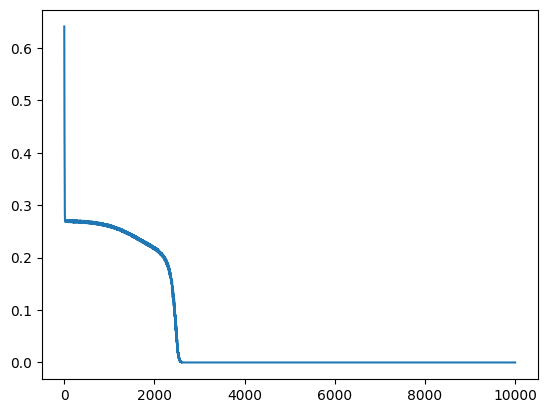

In [18]:
def train_model():
    EPOCHS = 10000
    def train_one_epoch(epoch_index):
        totalloss = 0.

        for i, data in enumerate(train_data_loader):
            inputs, labels = data
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = loss_fn(outputs.flatten(), labels)
            loss.backward()
            optimizer.step()
            totalloss += loss.item()
        return totalloss/(len(train_data_loader) * batch_size)

    for epoch in range(EPOCHS):
        model.train(True)
        avg_loss = train_one_epoch(epoch)
        loss_list.append(avg_loss)
        if epoch % 1000 == 0:
            print(f'Epoch {epoch}/{EPOCHS}, Loss: {avg_loss}')
    plt.plot(loss_list)
    plt.show()
train_model()

In [31]:
param_count = 0
for param in model.parameters():
    param_count += param.numel()  # Adds the number of elements in each parameter tensor
for param in model.named_parameters():
    print(param)
print(f"\n Number of parameters={param_count-1}")
for i, data in enumerate(train_data_loader):
    input,_=data
    model.eval()
    print(f"The input is = {input}".format(input.flatten()))
    print(f"Output y predicted = {model(input).round().item()}\n")


('linear1.weight', Parameter containing:
tensor([[3.2091, 3.2412],
        [1.0289, 1.0330]], device='cuda:0', requires_grad=True))
('linear1.bias', Parameter containing:
tensor([ 0.1916, -0.9361], device='cuda:0', requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[-2.3264,  2.2161]], device='cuda:0', requires_grad=True))
('linear2.bias', Parameter containing:
tensor([0.6501], device='cuda:0', requires_grad=True))
('activation2.weight', Parameter containing:
tensor([[-2.2633]], device='cuda:0', requires_grad=True))

 Number of parameters=9
The input is = tensor([[0., 1.]], device='cuda:0')
Output y predicted = 1.0

The input is = tensor([[0., 0.]], device='cuda:0')
Output y predicted = 0.0

The input is = tensor([[1., 1.]], device='cuda:0')
Output y predicted = 0.0

The input is = tensor([[1., 0.]], device='cuda:0')
Output y predicted = 1.0



### Repeat Qn 1 by modifying the activation function to ReLU.

Epoch 0/10000, Loss: 0.5
Epoch 1000/10000, Loss: 0.5
Epoch 2000/10000, Loss: 0.5
Epoch 3000/10000, Loss: 0.5
Epoch 4000/10000, Loss: 0.5
Epoch 5000/10000, Loss: 0.5
Epoch 6000/10000, Loss: 0.5
Epoch 7000/10000, Loss: 0.5
Epoch 8000/10000, Loss: 0.5
Epoch 9000/10000, Loss: 0.5


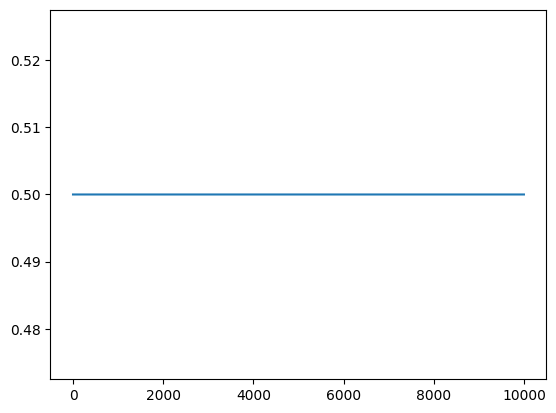

In [11]:
model.activation2 = nn.ReLU()
loss_list=[]
train_model()

In [13]:
param_count = 0
for param in model.parameters():
    param_count += param.numel()  # Adds the number of elements in each parameter tensor
for param in model.named_parameters():
    print(param)
print(f"\nNumber of parameters={param_count-1}")
for i, data in enumerate(train_data_loader):
    input,_=data
    model.eval()
    print(f"The input is = {input}".format(input.data))
    print(f"Output y predicted = {model(input).round().item()}\n")

('linear1.weight', Parameter containing:
tensor([[2.7157, 2.9884],
        [1.0178, 1.0725]], device='cuda:0', requires_grad=True))
('linear1.bias', Parameter containing:
tensor([-0.0124, -1.0801], device='cuda:0', requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[-2.1563,  2.2469]], device='cuda:0', requires_grad=True))
('linear2.bias', Parameter containing:
tensor([0.5019], device='cuda:0', requires_grad=True))

Number of parameters=8
The input is = tensor([[1., 1.]], device='cuda:0')
Output y predicted = 0.0

The input is = tensor([[0., 0.]], device='cuda:0')
Output y predicted = 0.0

The input is = tensor([[0., 1.]], device='cuda:0')
Output y predicted = 0.0

The input is = tensor([[1., 0.]], device='cuda:0')
Output y predicted = 0.0



### Manually verify the output values by taking system generated values of weights and biasesfor both Linear1 and Linear2 layers for Qn 1 and apply the transformations to input X and implement the same.

In [33]:
# model.activation2 = nn.Linear(1,1,bias=False)
# loss_list=[]
# train_model()
w1 = model.linear1.weight.data
w2 = model.linear2.weight.data
b1 = model.linear1.bias.data
b2 = model.linear2.bias.data
w3 = model.activation2.weight.data
print(w1,w2,b1,b2,w3)

tensor([[3.2091, 3.2412],
        [1.0289, 1.0330]], device='cuda:0') tensor([[-2.3264,  2.2161]], device='cuda:0') tensor([ 0.1916, -0.9361], device='cuda:0') tensor([0.6501], device='cuda:0') tensor([[-2.2633]], device='cuda:0')


In [34]:
for x, y in train_data_loader:
    o1 = torch.matmul(x, w1.T) + b1
    o1 = torch.sigmoid(o1)  # Apply activation function to first layer output
    o = torch.matmul(o1, w2.T) + b2
    o = torch.matmul(o,w3.T)
#     o = torch.sigmoid(o)    # Apply activation function to final output
    
#     o_rounded = torch.round(o)  # Round the output to 0 or 1

    print(x, o.item())  # Print the rounded output


tensor([[1., 1.]], device='cuda:0') 1.3490164008089778e-07
tensor([[0., 1.]], device='cuda:0') 0.9999998211860657
tensor([[0., 0.]], device='cuda:0') 2.6980328016179556e-07
tensor([[1., 0.]], device='cuda:0') 0.9999998211860657


### Implement Feed Forward Neural Network with two hidden layers for classifying handwritten digits using MNIST dataset. Display the classification accuracy in the form of a Confusion matrix. Verify the number of learnable parameters in the model.

Epoch 1, Loss: 0.6335, Accuracy: 81.87%
Epoch 2, Loss: 0.2863, Accuracy: 91.48%
Epoch 3, Loss: 0.2229, Accuracy: 93.34%
Epoch 4, Loss: 0.1807, Accuracy: 94.73%
Epoch 5, Loss: 0.1513, Accuracy: 95.50%
Epoch 6, Loss: 0.1292, Accuracy: 96.17%
Epoch 7, Loss: 0.1128, Accuracy: 96.65%
Epoch 8, Loss: 0.0992, Accuracy: 97.04%
Epoch 9, Loss: 0.0909, Accuracy: 97.27%
Epoch 10, Loss: 0.0806, Accuracy: 97.59%


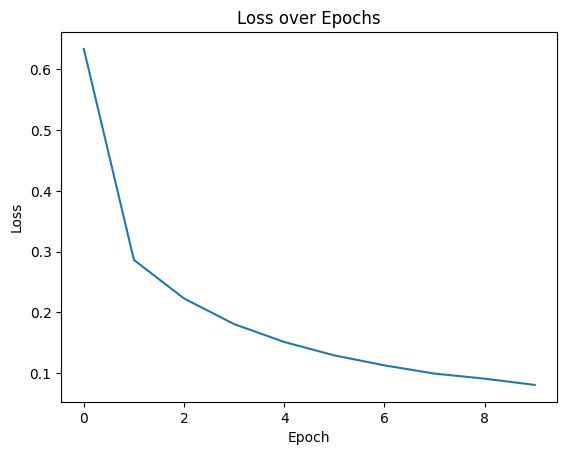

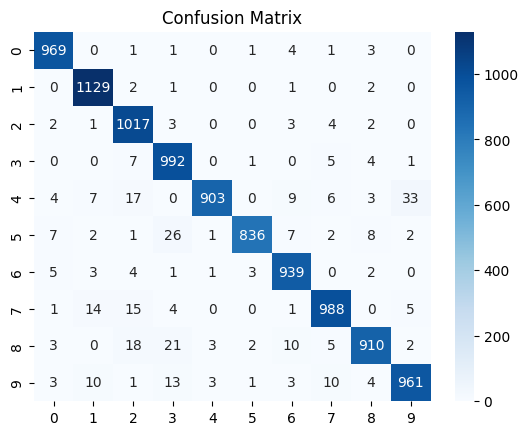

Accuracy on test set: 96.44%
Total parameters: 109386


In [35]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np

class FeedForwardNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)  
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.fc3(x)

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_loader = DataLoader(datasets.MNIST(root='./data', train=True, download=True, transform=transform), batch_size=64, shuffle=True)
test_loader = DataLoader(datasets.MNIST(root='./data', train=False, download=True, transform=transform), batch_size=64)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = FeedForwardNN().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.03)
loss_fn = nn.CrossEntropyLoss()

def train_model():
    losses, accuracies = [], []
    for epoch in range(10):
        model.train()
        running_loss, correct, total = 0, 0, 0

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()

            outputs = model(inputs)
            loss = loss_fn(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

        losses.append(running_loss / len(train_loader))
        accuracies.append(100 * correct / total)
        print(f"Epoch {epoch+1}, Loss: {losses[-1]:.4f}, Accuracy: {accuracies[-1]:.2f}%")

    plt.plot(losses)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Loss over Epochs')
    plt.show()

def evaluate_model():
    model.eval()
    all_labels, all_preds = [], []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            all_labels.extend(labels.cpu().numpy())
            all_preds.extend(predicted.cpu().numpy())

    cm = confusion_matrix(all_labels, all_preds)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
    plt.title('Confusion Matrix')
    plt.show()

    accuracy = 100 * np.sum(np.array(all_labels) == np.array(all_preds)) / len(all_labels)
    print(f'Accuracy on test set: {accuracy:.2f}%')

def count_parameters():
    print(f"Total parameters: {sum(p.numel() for p in model.parameters())}")

train_model()
evaluate_model()
count_parameters()
